# The Mechanism of Learning

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# Iterate Optimization
# from tqdm.autonotebook import tqdm
from tqdm import tqdm

# PyTorch
import torch
from torch.utils.data import Dataset

# Time
import timeit

# Warning
import warnings

# Scikit-Learn
from sklearn.datasets import fetch_openml

In [2]:
# Visualization Performance Set-Up
%matplotlib inline

matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')

### The World as A Tensor

In [3]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,], 
                             [7, 8,]])

torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3], 
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9], 
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15], 
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21], 
                            [22, 23, 24],
                            ]
                              ])

In [4]:
# Getting tensor's shapes
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [5]:
# NumPy Approach as follow:
x_np = np.random.random((4,4))
print(x_np)

[[0.49202434 0.90041317 0.05595605 0.83421197]
 [0.74474405 0.8499492  0.20529378 0.97968962]
 [0.62397263 0.54353776 0.39696147 0.65286647]
 [0.29856885 0.03472659 0.06053327 0.8559731 ]]


In [6]:
# Numpy on Tensors:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.4920, 0.9004, 0.0560, 0.8342],
        [0.7447, 0.8499, 0.2053, 0.9797],
        [0.6240, 0.5435, 0.3970, 0.6529],
        [0.2986, 0.0347, 0.0605, 0.8560]], dtype=torch.float64)


In [7]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [8]:
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float32 torch.float32


In [9]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[False  True False  True]
 [ True  True False  True]
 [ True  True False  True]
 [False False False  True]]
bool


In [10]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[False,  True, False,  True],
        [ True,  True, False,  True],
        [ True,  True, False,  True],
        [False, False, False,  True]])
torch.bool


In [11]:
np.sum(x_np)

8.529423

In [12]:
torch.sum(x_pt)

tensor(8.5294)

In [13]:
np.transpose(x_np)

array([[0.49202433, 0.74474406, 0.62397265, 0.29856884],
       [0.90041316, 0.8499492 , 0.54353774, 0.03472659],
       [0.05595605, 0.20529379, 0.39696148, 0.06053327],
       [0.83421195, 0.9796896 , 0.6528665 , 0.8559731 ]], dtype=float32)

In [14]:
torch.transpose(x_pt, 0, 1)

tensor([[0.4920, 0.7447, 0.6240, 0.2986],
        [0.9004, 0.8499, 0.5435, 0.0347],
        [0.0560, 0.2053, 0.3970, 0.0605],
        [0.8342, 0.9797, 0.6529, 0.8560]])

In [15]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)

torch.Size([3, 2, 4])


#### PyTorch GPU Acceleration

In [16]:
x = torch.rand(2**11, 2**11)

time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [17]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : False


In [19]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)

In [21]:
# x*y

#### Setting up a MoveTo Function:

In [23]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj
    
some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))

## 

/Users/isisromero/anaconda3/envs/NLP_transformer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isisromero/anaconda3/envs/NLP_transformer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


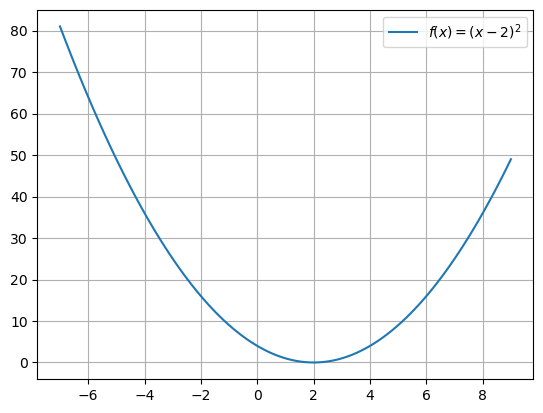

In [30]:
def f(x):
    return torch.pow((x-2.0), 2)

x_axis_vals = np.linspace(-7,9,100) 
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')
plt.grid(True)
plt.show()

##### Using Derivative

/Users/isisromero/anaconda3/envs/NLP_transformer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isisromero/anaconda3/envs/NLP_transformer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isisromero/anaconda3/envs/NLP_transformer/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isisromero/anaconda3/envs/NLP_transformer/lib/python3.11/site-packages/seaborn/_oldcore.py

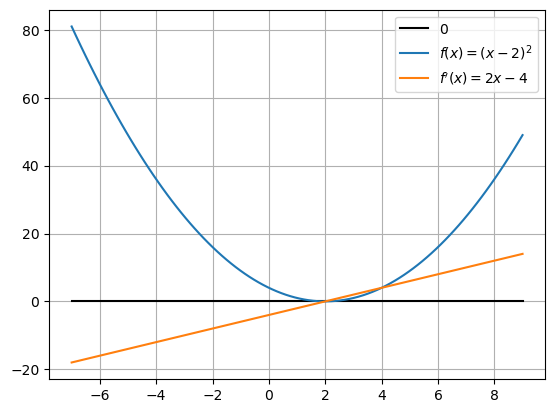

In [31]:
def fP(x): #Defining the derivative of f(x) manually
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="$f'(x)=2 x - 4$")
plt.grid(True)
plt.show()

##### Calculating a Derivative with Automatic Differentiation

In [ ]:
x = torch.tensor([-3.5], requires_grad=True)

print(x.grad)

In [ ]:
value = f(x)

print(value)

In [ ]:
value.backward()

print(x.grad)

In [ ]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100 
epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() 
    
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() 
    
    x_cur = x.data
    
print(x_cur)

In [ ]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)

In [ ]:
optimizer = torch.optim.SGD([x_param], lr=eta)

In [ ]:
for epoch in range(60):
    optimizer.zero_grad() 
    loss_incurred  = f(x_param)
    loss_incurred.backward()
    optimizer.step() 

print(x_param.data)

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X.shape)

In [ ]:
class SimpleDataset(Dataset):
        
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets 

    def __len__(self):
        return self.X.shape[0]

dataset = SimpleDataset(X, y)

In [ ]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

In [ ]:
plt.imshow(example.reshape((28,28)))

In [ ]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))